Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Fix all the plots!
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['legend.markerscale']= 3.0

dark_theme = 0
if dark_theme:
    plt.rcParams['axes.labelcolor'] = 'grey'
    plt.rcParams['text.color'] = 'red'

    plt.rcParams['xtick.color'] = 'grey'
    plt.rcParams['ytick.color'] = 'grey'

    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['ytick.major.size'] = 5

plt.rcParams['text.color'] = 'black'

In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Score =  1.0
Score =  1.0
[2.1]
[[-0.5 -0.1]]


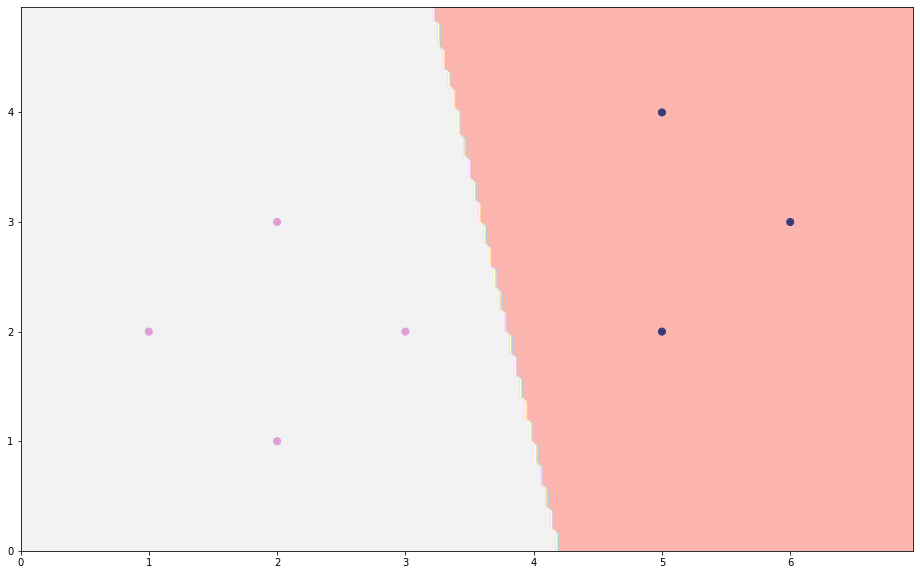

In [6]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha=0.0, fit_intercept=True).fit(seven_X, seven_y)
print("Score = ", clf.score(seven_X, seven_y))
print("Score = ", sklearn.metrics.accuracy_score(seven_y, clf.predict(seven_X)))

plot_2d_clf_problem(seven_X, seven_y, h=clf.predict)


print(clf.intercept_)
print(clf.coef_)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Score =  0.8833333333333332
1.5500000000000003
[-0.25 -0.05]


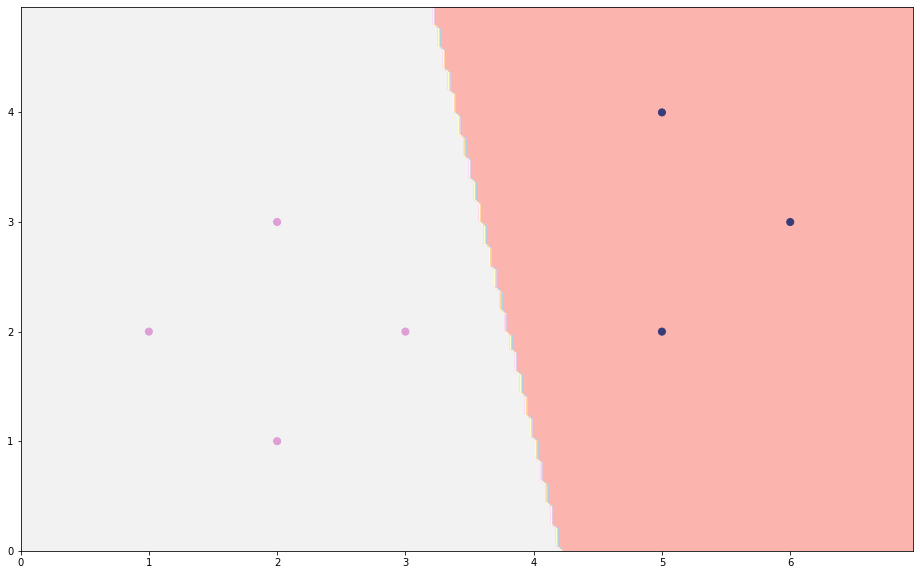

In [7]:
# Vaš kôd ovdje

clf = LinearRegression().fit(seven_X, seven_y)
print("Score = ", clf.score(seven_X, seven_y))

plot_2d_clf_problem(seven_X, seven_y, lambda x : clf.predict(x) >= 0.5 )


print(clf.intercept_)
print(clf.coef_)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Score =  0.875
Score =  0.875


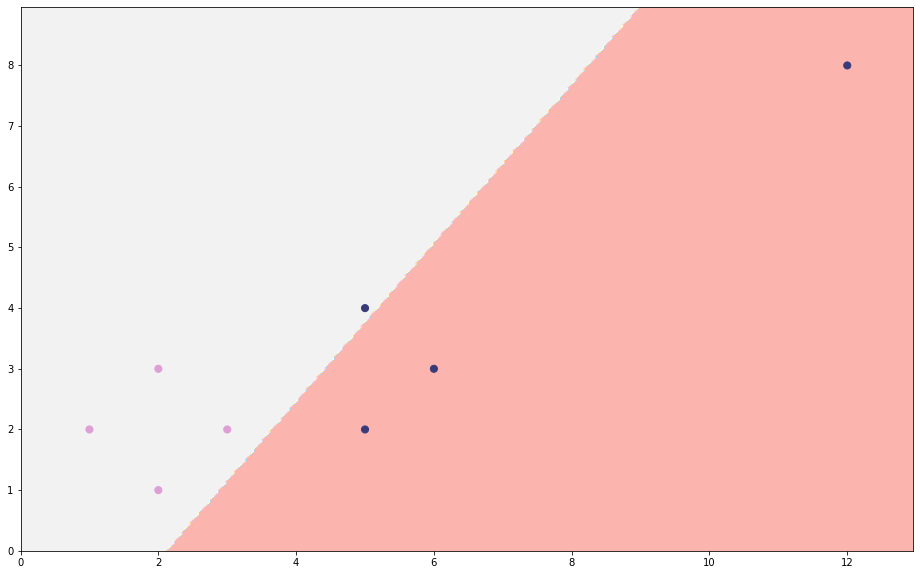

In [9]:
# Vaš kôd ovdje

clf = RidgeClassifier(alpha=0.0).fit(outlier_X, outlier_y)
print("Score = ", clf.score(outlier_X, outlier_y))
print("Score = ", sklearn.metrics.accuracy_score(outlier_y, clf.predict(outlier_X)))

plot_2d_clf_problem(outlier_X, outlier_y, h=clf.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Score =  0.875


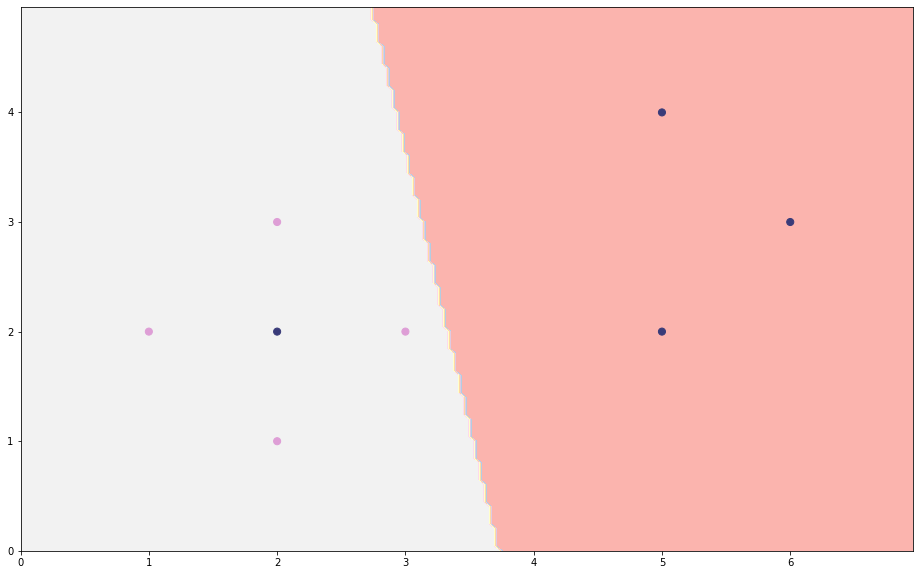

In [11]:
# Vaš kôd ovdje

clf = RidgeClassifier(alpha=0.0).fit(unsep_X, unsep_y)
print("Score = ", clf.score(unsep_X, unsep_y))

plot_2d_clf_problem(unsep_X, unsep_y, h=clf.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

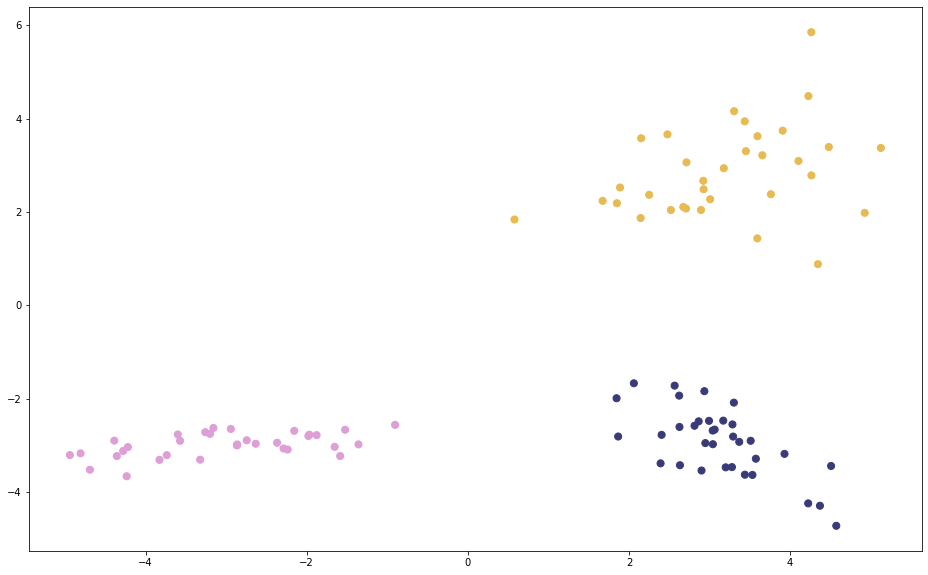

In [12]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje
data_X, data_y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                    n_classes=3, n_clusters_per_class=1, 
                            class_sep=3, random_state = 59)

plot_2d_clf_problem(data_X, data_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Score =  1.0


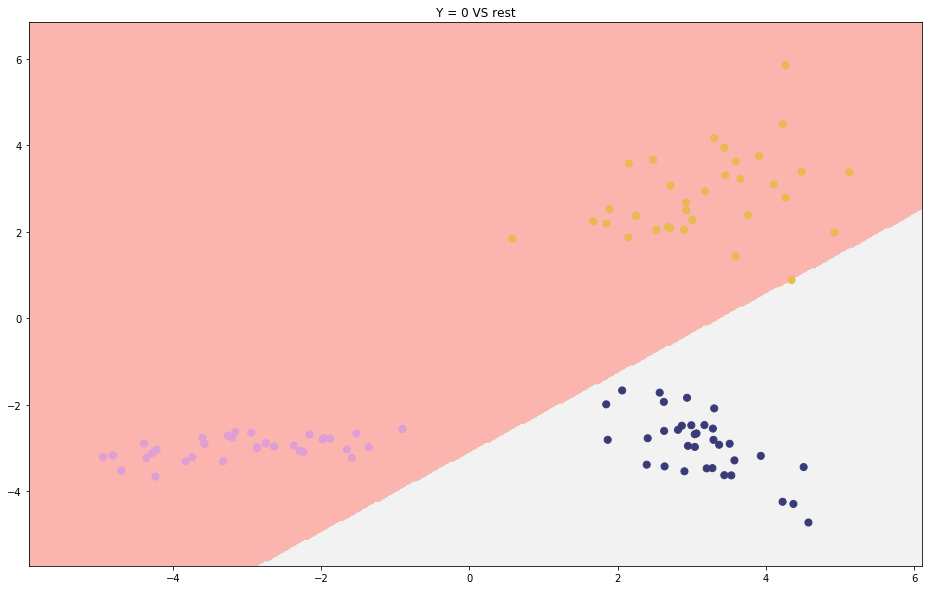

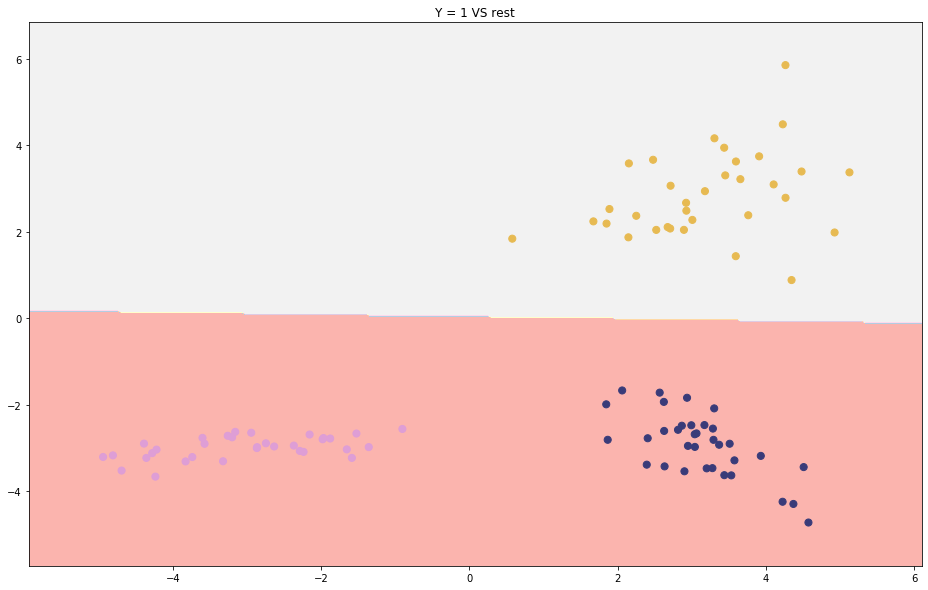

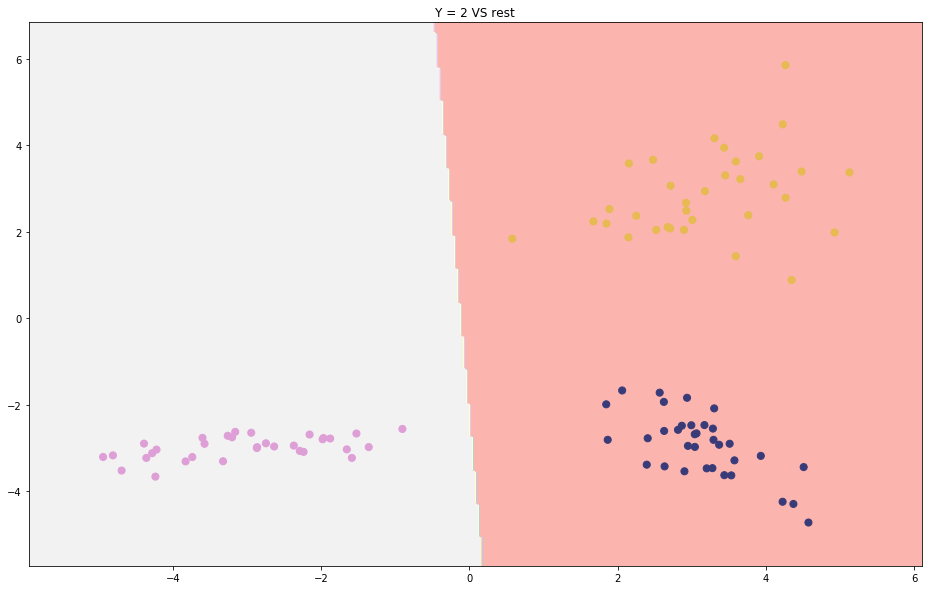

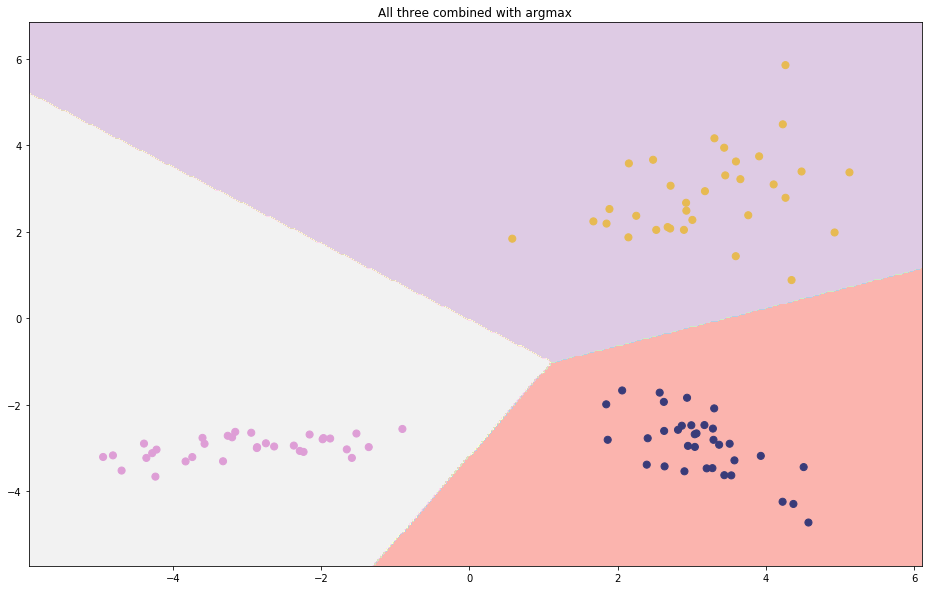

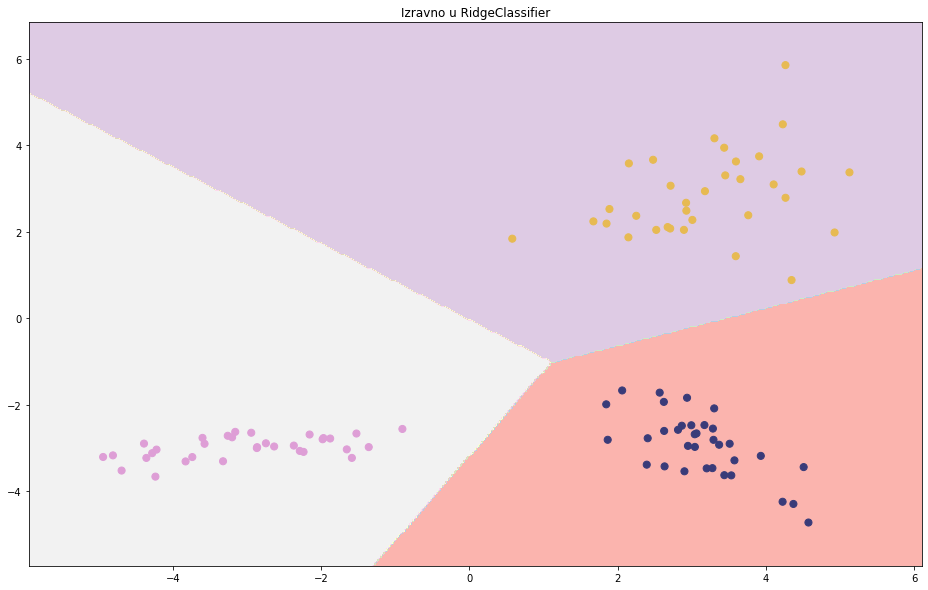

In [13]:
# Vaš kôd ovdje
classifiers = []

for i in [0, 1, 2]:
    
    plt.figure()
    plt.title("Y = " + str(i) + " VS rest")
    clf = RidgeClassifier(alpha=0.0).fit(data_X, data_y == i)
    plot_2d_clf_problem(data_X, data_y, h=clf.predict)
    classifiers.append(clf)

def h_predict(X):
    return np.argmax([x.decision_function(X) for x in classifiers] , axis=0)
    
# Sva tri zajedno
plt.figure()
plt.title("All three combined with argmax")
plot_2d_clf_problem(data_X, data_y, h=h_predict)

#Izravno

clf = RidgeClassifier(alpha=0.0).fit(data_X, data_y)
print("Score = ", clf.score(data_X, data_y))

plt.figure()
plt.title("Izravno u RidgeClassifier")
plot_2d_clf_problem(data_X, data_y, h=clf.predict)


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

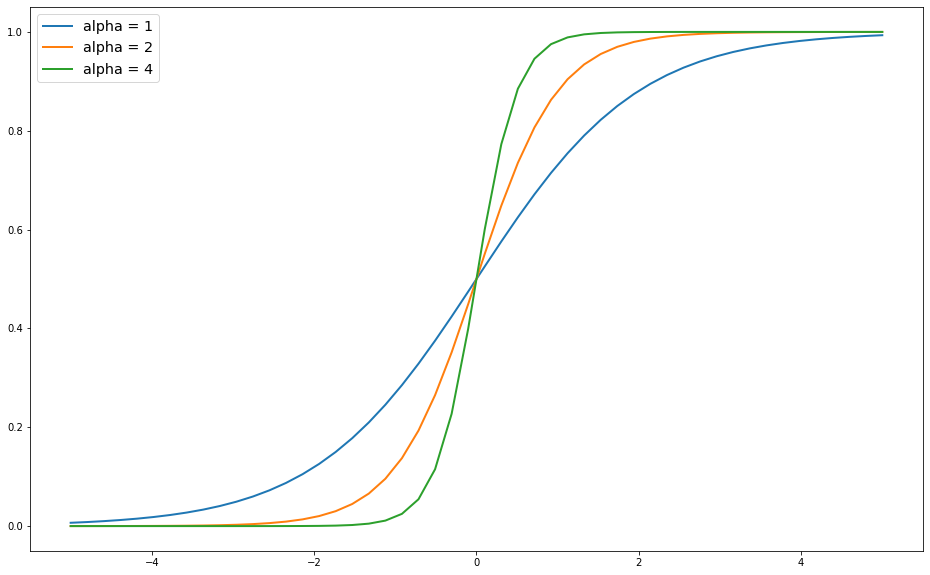

In [14]:
# Vaš kôd ovdje
def sigmoid(alpha, X) :
    return 1.0 / ( 1.0 + np.exp(-1 * alpha * X))

s = np.linspace(-5, 5);

for alpha in [1 ,2 ,4]:
    plt.plot(s, sigmoid(alpha, s), label=('alpha = ' + str(alpha)))

plt.legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [15]:
from numpy import linalg

def lr_h(x, w): 
    # Vaš kôd ovdje
    return sigmoid(1.0, (np.array( np.dot( x, w) , dtype=float)) )

    
def cross_entropy_error(X, y, w): 
    # Vaš kôd ovdje
    return sum(-1.0 * y * np.log(lr_h(X, w)) - 1.0 * (1.0 - y) * np.log(1.0 - lr_h(X, w))) / np.shape(X)[0]

# eta = stopa ucenja nj 

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, debug=False, alpha=0, epsilon=0.0001):
    # Vaš kôd ovdje
    w = np.zeros(np.shape(X)[1] , dtype=np.ndarray)
    w_s = []
    eps_s = []
    
    eps_computed = 1
    itr = 0
    cross_prev = 0
    while ( eps_computed > epsilon and itr < max_iter  ):
        itr = itr + 1
        
        delta_w = np.zeros(np.shape(X)[1] , dtype=np.ndarray)
  
        # Regularizacija
        # bez w0
        eye_bez_prvog = np.ones(delta_w.shape, dtype=int)
        eye_bez_prvog[0] = 0

        if 1:
            h = lr_h(X, w)
            delta_w = np.dot((h - y), X)
        
        else:
            for i in (range(np.shape(X)[0])):
                h = lr_h(X[i], w)
                delta_w = delta_w + np.dot((h - y[i]), X[i])

        w = w * (1 - eta * alpha * eye_bez_prvog) - eta * delta_w
        cross_new = cross_entropy_error(X, y, w)

        eps_computed = np.abs(cross_new - cross_prev)
        cross_prev = cross_new
        
        if debug:
            print('cross_new =  ', cross_prev)
            print('cross_new =  ', cross_new)
            print('epsilon_computed = ', eps_computed)
        
        
        eps_s.append(eps_computed)
        w_s.append(w)
    
    if trace:
        return w, w_s, eps_s, itr
    else:
        return w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

#_iters =  947
w = [4.4544945420360165 -1.7108924201238558 0.6841350736281353]
Cross entropy error =  0.13521872720206746


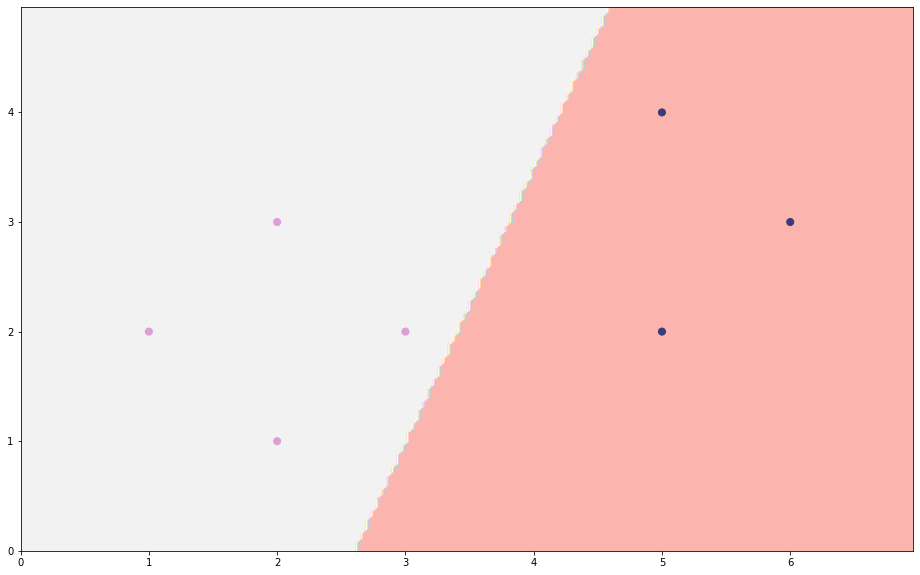

In [16]:
# Vaš kôd ovdje
if 1:
    #print(seven_X)
    N = np.shape(seven_X)
    seven_X_expanded = np.ones((N[0], N[1] + 1), dtype=float)
    seven_X_expanded[:,1:] = seven_X


w, w_s, eps_s, itr = lr_train(seven_X_expanded, seven_y, 
                              eta=0.01, max_iter=2000, trace=True, alpha=0.00, epsilon=0.0001)

print('#_iters = ', itr)
print('w =', w)

print('Cross entropy error = ', cross_entropy_error(seven_X_expanded, seven_y, w))


def h2_predictor(X, w):
    # X - convert (n) to (n + 1)
    N = np.shape(X)
    X_expanded = np.ones((N[0], N[1] + 1), dtype=float)
    X_expanded[:,1:] = X
    
    # then predict using predictor and w
    return lr_h(X_expanded, w)
    

plot_2d_clf_problem(seven_X, seven_y, lambda x : h2_predictor(x, w) >= 0.5)



**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [17]:
from sklearn.metrics import zero_one_loss

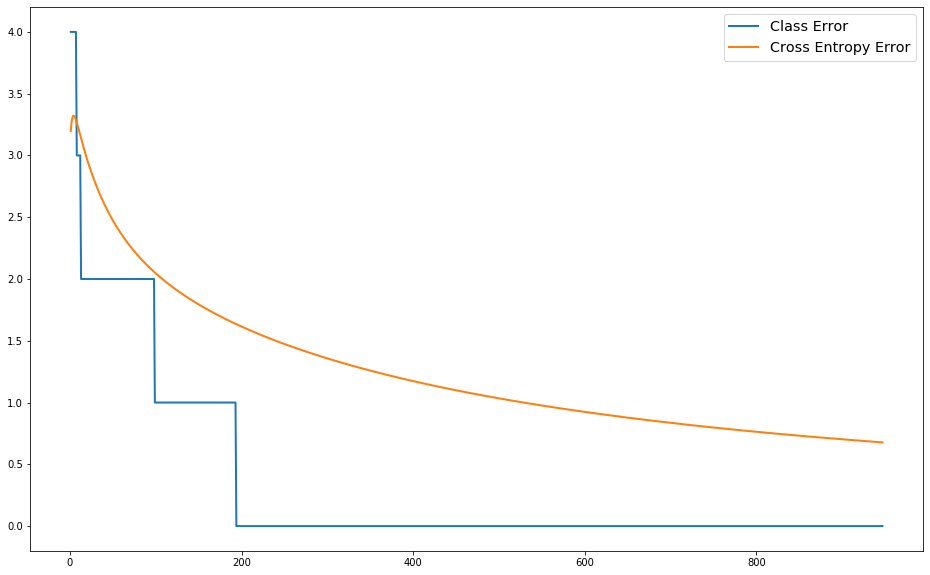

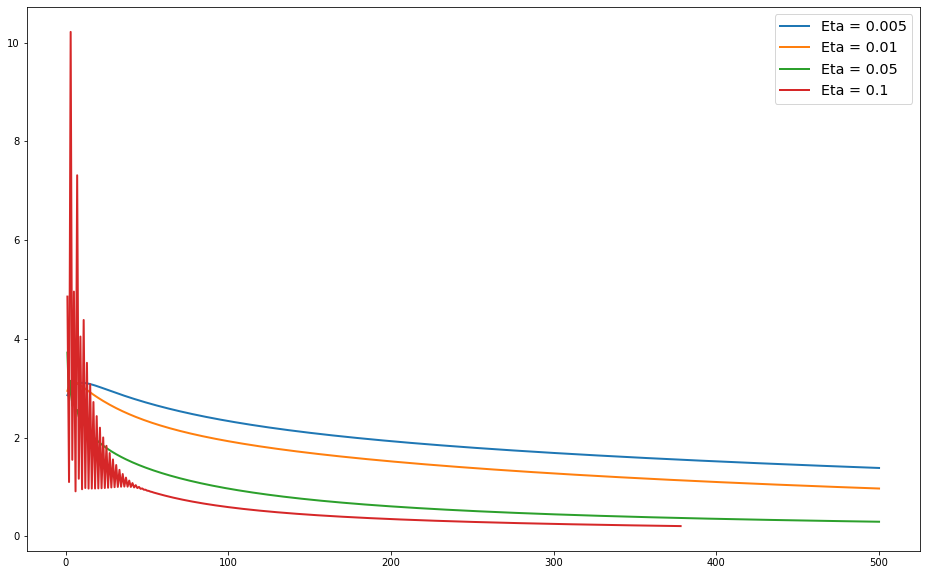

In [18]:
# Vaš kôd ovdje

w, w_s, eps_s, itr = lr_train(seven_X_expanded, seven_y, 
                              eta=0.01, max_iter=2000, trace=True, alpha=0.00, epsilon=0.0001)

iter_by_hs = lr_h(seven_X_expanded, np.transpose(w_s))

class_errors_iter = abs(np.sum(np.transpose(iter_by_hs > 0.5) - seven_y, axis = 1))


cross_entropy_iter =  -1.0 * np.dot( np.transpose(seven_y), np.log(lr_h(seven_X_expanded, np.transpose(w_s)))) \
        - 1.0 * np.dot( np.transpose((1.0 - seven_y)), np.log(1.0 - lr_h(seven_X_expanded, np.transpose(w_s)))) \
            / np.shape(seven_X_expanded)[0]

plt.figure()
plt.plot(range(1, itr + 1), class_errors_iter, label='Class Error')
plt.plot(range(1, itr + 1), cross_entropy_iter, label='Cross Entropy Error')

plt.legend()
plt.show()


plt.figure()
for eta in [0.005, 0.01, 0.05, 0.1]:
#for eta in [0.03, 0.1, 0.3, 0.6]:
    w, w_s, eps_s, itr = lr_train(seven_X_expanded, seven_y, 
                              eta= eta, max_iter=500, trace=True, alpha=0.00, epsilon=0.0001)
        
    cross_entropy_iter =  -1.0 * np.dot( np.transpose(seven_y), np.log(lr_h(seven_X_expanded, np.transpose(w_s)))) 
    - 1.0 * np.dot( np.transpose((1.0 - seven_y)), np.log(1.0 - lr_h(seven_X_expanded, np.transpose(w_s)))) \
        / np.shape(seven_X_expanded)[0]
    
    plt.plot(range(1, itr + 1), cross_entropy_iter, label=('Eta = ' + str(eta)))

plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

[12.56268885]
[[-2.87194125 -0.58249803]]


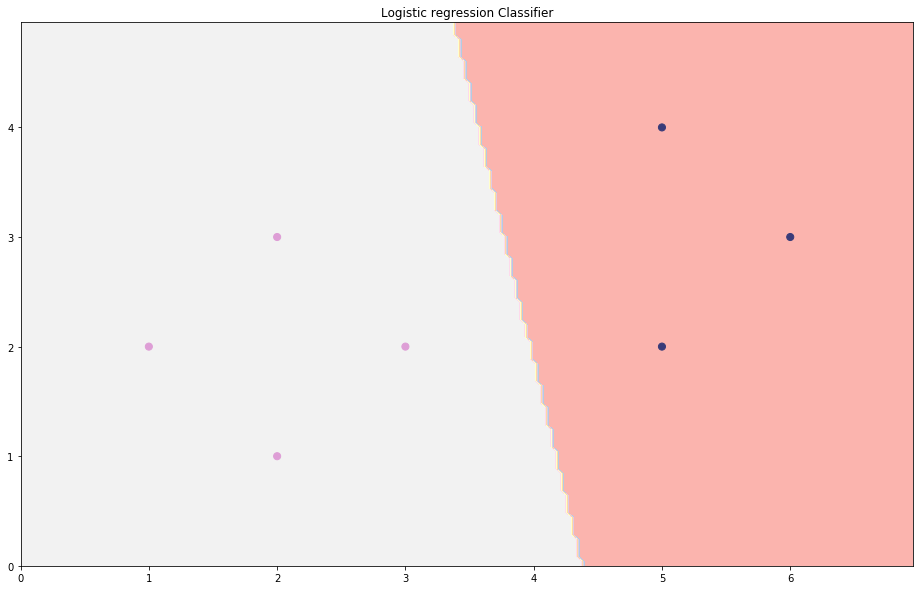

In [19]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
clf = LogisticRegression(max_iter=200, C = 20.0, solver='lbfgs').fit(seven_X, seven_y)

print(clf.intercept_)
print(clf.coef_)


plt.figure()
plt.title("Logistic regression Classifier")
plot_2d_clf_problem(seven_X, seven_y, h=clf.predict)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

[12.56236196]
[[-2.87192432 -0.58229238]]


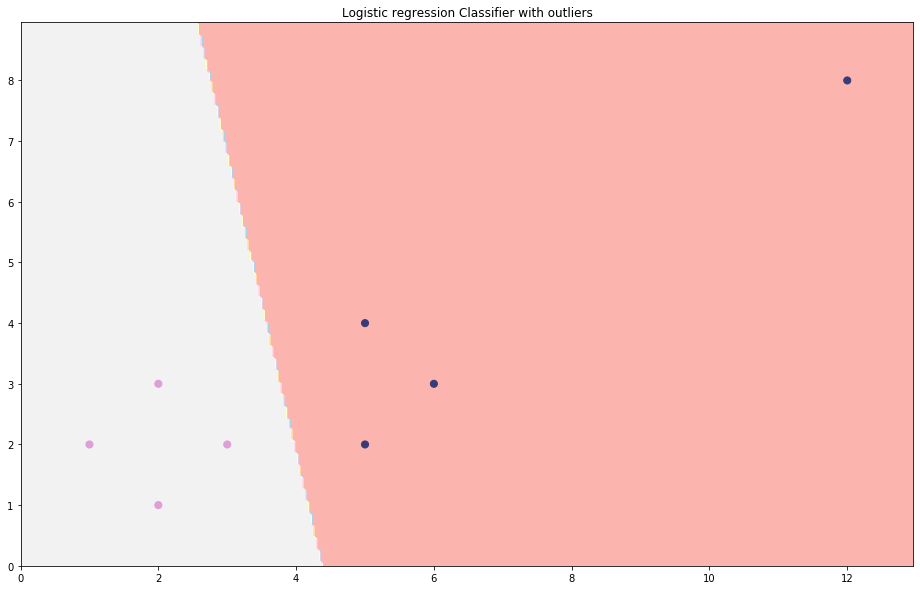

In [20]:
# Vaš kôd ovdje

clf = LogisticRegression(max_iter=200, C = 20.0, solver='lbfgs').fit(outlier_X, outlier_y)

print(clf.intercept_)
print(clf.coef_)


plt.figure()
plt.title("Logistic regression Classifier with outliers")
plot_2d_clf_problem(outlier_X, outlier_y, h=clf.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

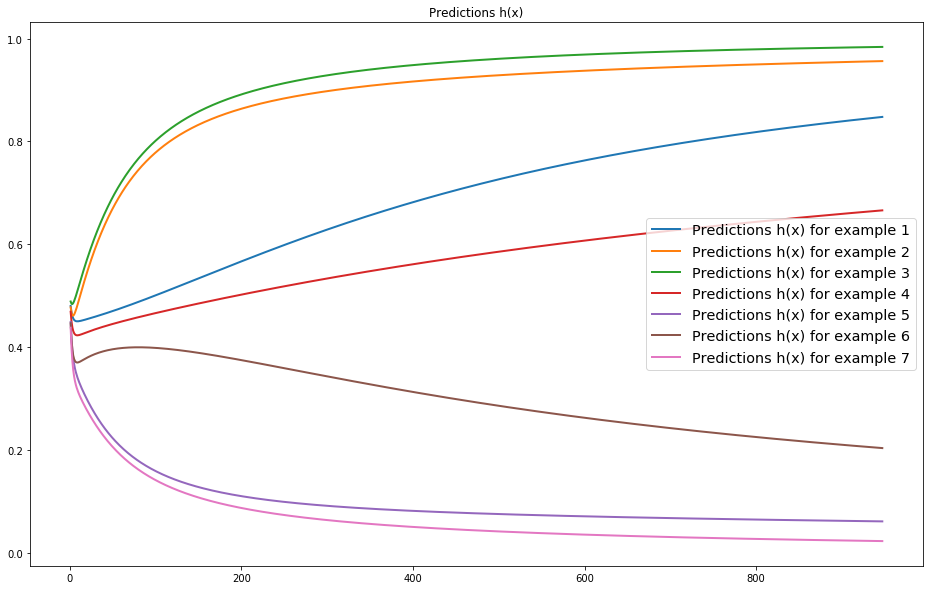

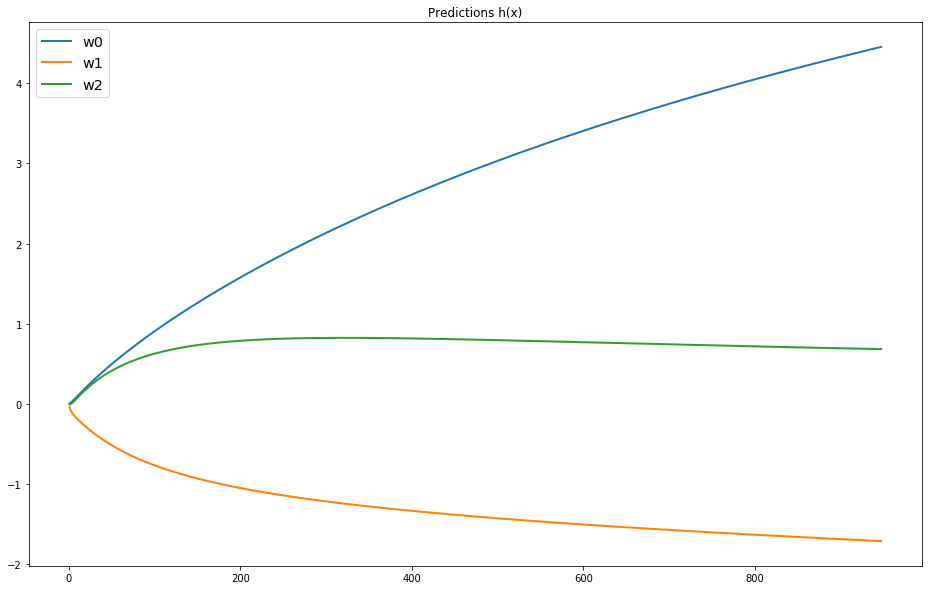

In [21]:
# Vaš kôd ovdje


w, w_s, eps_s, itr = lr_train(seven_X_expanded, seven_y, 
                              eta=0.01, max_iter=2000, trace=True, alpha=0.00, epsilon=0.0001)


plt.figure()
plt.title("Predictions h(x)")

#np.shape(lr_h(seven_X_expanded, np.transpose(w_s)))
iter_by_hs = lr_h(seven_X_expanded, np.transpose(w_s))
preds = (iter_by_hs)

for i in range(7):
    plt.plot(range(1, itr + 1), preds[i], label=("Predictions h(x) for example " + str(i + 1) ))

plt.legend()

plt.figure()
plt.title("Predictions h(x)")

w_s_print = np.transpose(w_s)

for i in range(3):
    plt.plot(range(1, itr + 1), w_s_print[i], label=("w" + str(i) ))

plt.legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

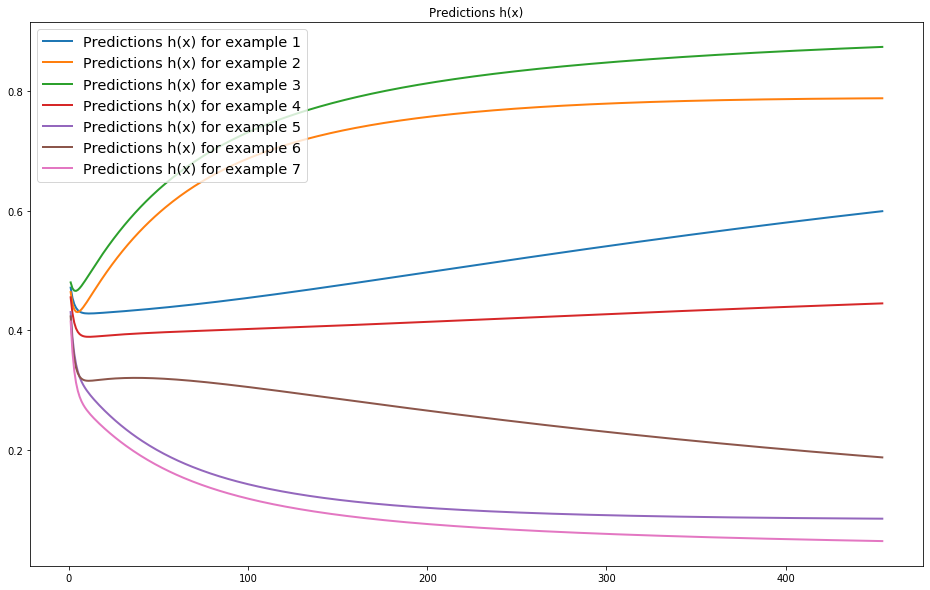

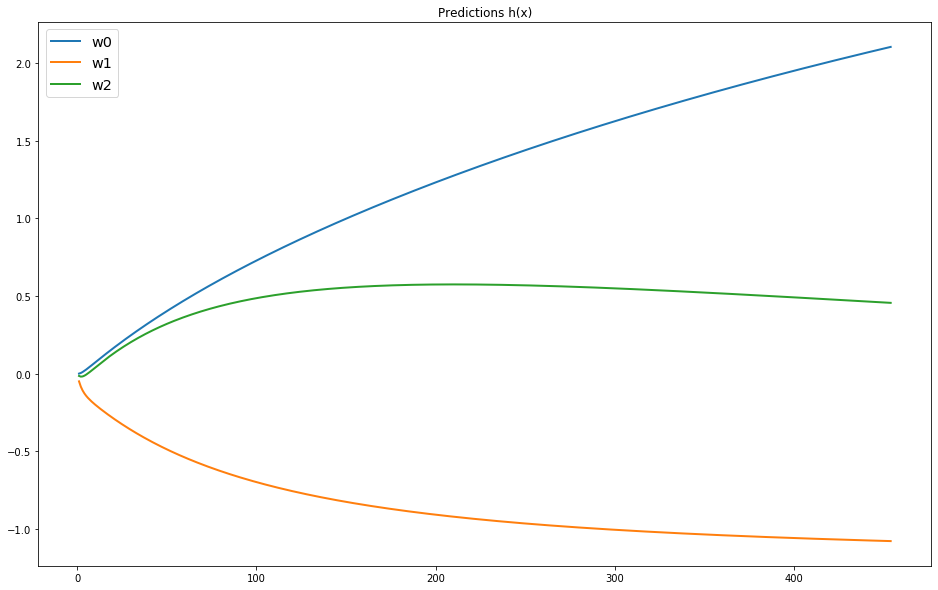

In [22]:
# Vaš kôd ovdje
 
if 1:
    #print(seven_X)
    N = np.shape(unsep_X)
    unsep_X_expanded = np.ones((N[0], N[1] + 1), dtype=np.ndarray)
    unsep_X_expanded[:,1:] = unsep_X

    #print(seven_X_expanded)


w, w_s, eps_s, itr = lr_train(unsep_X_expanded, unsep_y, 
                              eta=0.01, max_iter=2000, trace=True, alpha=0.00, epsilon=0.0001)


plt.figure()
plt.title("Predictions h(x)")

#np.shape(lr_h(seven_X_expanded, np.transpose(w_s)))
iter_by_hs = lr_h(seven_X_expanded, np.transpose(w_s))
preds = (iter_by_hs)

for i in range(7):
    plt.plot(range(1, itr + 1), preds[i], label=("Predictions h(x) for example " + str(i + 1) ))

plt.legend()

plt.figure()
plt.title("Predictions h(x)")

w_s_print = np.transpose(w_s)

for i in range(3):
    plt.plot(range(1, itr + 1), w_s_print[i], label=("w" + str(i) ))

plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [23]:
from numpy.linalg import norm

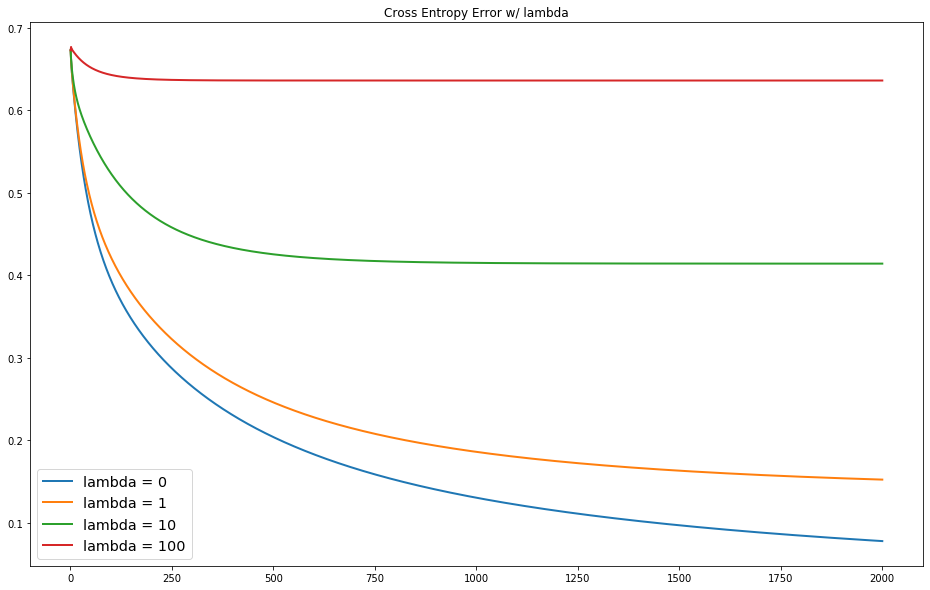

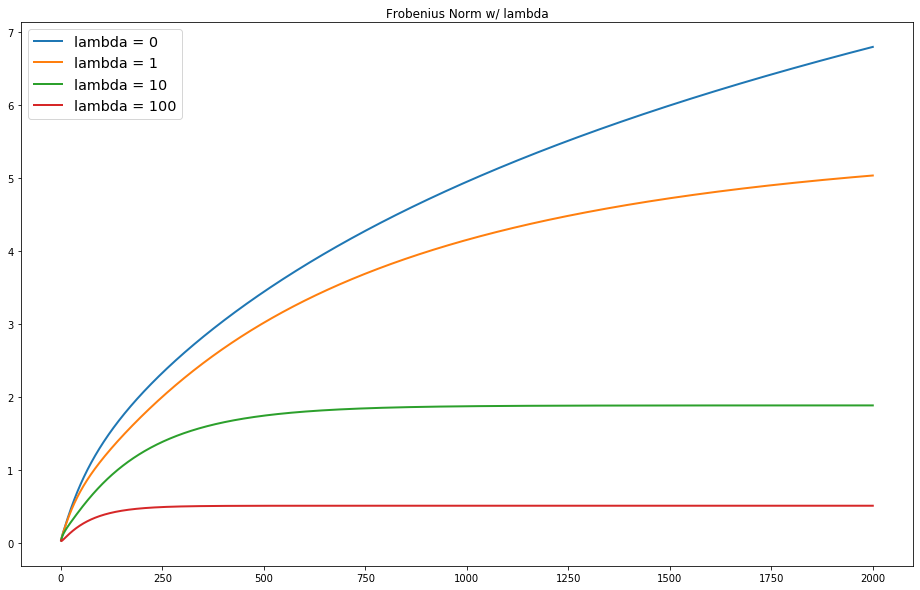

In [24]:
# Vaš kôd ovdje
plt.figure()
plt.title("Cross Entropy Error w/ lambda")
w_sss = {}
for alpha in [0, 1, 10, 100]:
    w, w_s, eps_s, itr = lr_train(seven_X_expanded, seven_y, 
                               eta=0.01, max_iter=2000, trace=True, alpha= alpha, epsilon=0.00000000000000001)
    
    cross_entropy_iter =  (-1.0 * np.dot( np.transpose(seven_y), np.log(lr_h(seven_X_expanded, np.transpose(w_s)))) 
    - 1.0 * np.dot( np.transpose((1.0 - seven_y)), np.log(1.0 - lr_h(seven_X_expanded, np.transpose(w_s)))) ) \
        / np.shape(seven_X_expanded)[0]
    
    plt.plot(range(1, itr + 1), cross_entropy_iter, label=('lambda = ' + str(alpha)))

    w_sss[alpha] = w_s
    
plt.legend()
plt.show()

plt.figure()

plt.title("Frobenius Norm w/ lambda")

for key in w_sss:
    plt.plot(range(1, itr + 1), norm(np.array( w_sss[key] , dtype=float), axis = 1), 
             label=('lambda = ' + str(key)))

plt.legend()
plt.show()


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [25]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

[-0.53686735]
[[ 5.53542250e-04  5.92217859e+00  2.22332626e-01 -1.05856216e+00
   7.15504254e-02 -5.57814833e-02 -6.11047939e-01  1.73095827e+00
   2.71586014e+00  1.11386675e+00]]


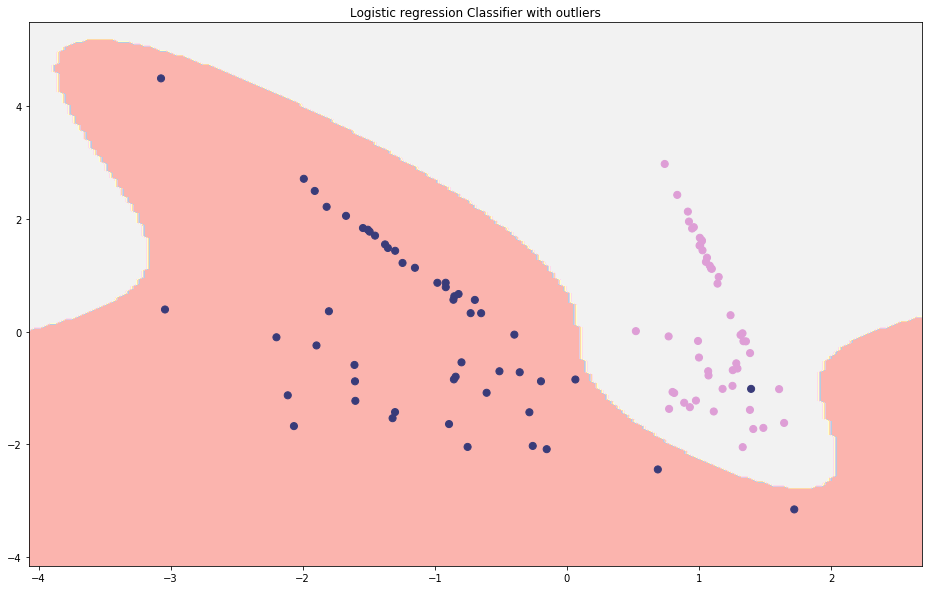

In [26]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
data2_X, data2_y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=2, class_sep=1.1, random_state=86)

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
poly.fit(data2_X)
#Logistic
clf = LogisticRegression(max_iter=200, C = 20.0, solver='lbfgs').fit(poly.transform(data2_X), data2_y)

print(clf.intercept_)
print(clf.coef_)


plt.figure()
plt.title("Logistic regression Classifier with outliers")
plot_2d_clf_problem(data2_X, data2_y, lambda x :clf.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?